MNIST에서 제공하는 필기 숫자 데이터 세트를 다운로드

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
x_train, x_test = train_data / 255.0, test_data / 255.0

#테스트 학습 데이터
print(test_labels)

[7 2 1 ... 4 5 6]


Index 0: Label 7


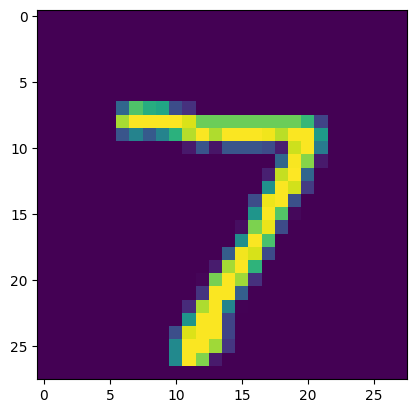

In [10]:
max_examples = 10000
data = train_data[:max_examples]
labels = train_labels[:max_examples]
plt.imshow(test_data[0].reshape((28, 28)))
print('Index %d: Label %d' % (0, test_labels[0]))

In [8]:
print(data[0].shape)

(28, 28)


결정트리를 이용한 경우

In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
width = 28
height = 28
train_data = train_data[:5000,:,:]
test_data = test_data[:500, :, :]

train_labels = train_labels[:5000]
test_labels = test_labels[:500]

train_data = train_data.reshape(5000, width*height).astype('float32') / 255.0
test_data = test_data.reshape(500, width*height).astype('float32') / 255.0

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score

print (accuracy_score (test_labels, predictions))

0.752


KNeighborsClassifier를 이용한 경우

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print (accuracy_score (test_labels, predictions))

0.91


직접 작성한 무작위 분류 방식을 이용한 경우

In [15]:
import random

class myKNN():
  def fit(self, train_data, train_labels):
    self.train_data = train_data
    self.train_labels = train_labels
  def predict(self, test_data):
    predictions = []
    for row in test_data:
      label = random.choice(self.train_labels)
      predictions.append(label)
    return predictions

clf = myKNN()
#나만의 구분자를 사용
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.09


직접 작성한 유클리디언 분류 방식을 이용 - 전체 데이터

In [16]:
from scipy.spatial import distance

def euc(a,b):
  # return abs(a-b)
  return distance.euclidean(a, b)

class eucKNN():
  def fit(self, train_data, train_labels):
    self.train_data = train_data
    self.train_labels = train_labels
  def predict(self, test_data):
    predictions = []
    for row in test_data:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  def closest(self, row):
    best_dist = euc(row, self.train_data[0])
    best_index = 0
    for i in range(1, len(self.train_data)):
      dist = euc(row, self.train_data[i])
      if dist < best_dist:
        best_dist = dist
        best_index = i
    return self.train_labels[best_index]

clf = eucKNN()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.906


직접 작성한 유클리디언 분류 방식을 이용 - 토이 데이터

In [17]:
from sklearn import datasets
digits = datasets.load_digits()
print(len(digits.data), len(digits.target))

1797 1797


In [18]:
from scipy.spatial import distance
def euc(a,b):
  return distance.euclidean(a, b)

class eucKNN():
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
  def predict(self, x_test):
    predictions = []
    for row in x_test:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  def closest(self, row):
    best_dist = euc(row, self.X_train[0])
    best_index = 0
    for i in range(1, len(self.X_train)):
      dist = euc(row, self.X_train[i])
      if dist< best_dist:
        best_dist = dist
        best_index = i
    return self.y_train[best_index]

clf = eucKNN()
clf.fit(digits.data[:-500], digits.target[:-500])
predictions = clf.predict(digits.data[-500:])

from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target[-500:], predictions))

0.96


서포트 벡터머신을 이용한 경우

In [19]:
from sklearn import svm
clf = svm.SVC (gamma=0.001, C=100.)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.926


위스키 데이터 세트에 기계학습 적용하기

In [20]:
import numpy as np
import pandas as pd

whisky = pd.read_csv('./whiskies.txt')
print(whisky.head())

   RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral     Postcode  Latitude  Longitude  
0      2      2      2       2       2   \tPH15 2EB    286580     749680  
1      2      2      3       3       2   \tAB38 9PJ    326340     842570  
2      0      2      2       3       2    \tAB5 5LI    352960     839320  
3      0      1      2       1       0   \tPA42 7EB    141560     646220  
4      1      2      3       1       1   \tAB54 4NH    355350     829140  


칼럼들에 대한 내용만 출력

In [21]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

regions.txt 파일에서 Pandas 형태로 읽어온 데이터 출력

In [23]:
regions = pd.read_csv("./regions.txt")

whisky['Regions'] = regions
print(whisky["Regions"])

0     Highlands
1      Speyside
2     Highlands
3         Islay
4     Highlands
        ...    
81      Islands
82    Highlands
83     Speyside
84     Speyside
85    Highlands
Name: Regions, Length: 86, dtype: object


데이터 참조

In [24]:
whisky.iloc[0:3]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Regions
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands


In [25]:
whisky.iloc[0:3, 2:14]

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2


위스키의 향미

In [26]:
flavors = whisky.iloc[:, 2:14]
print(flavors)

    Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0      2          2      2          0        0      2      1      2      2   
1      3          3      1          0        0      4      3      2      2   
2      1          3      2          0        0      2      0      0      2   
3      4          1      4          4        0      0      2      0      1   
4      2          2      2          0        0      1      1      1      2   
..   ...        ...    ...        ...      ...    ...    ...    ...    ...   
81     1          1      1          0        0      1      0      0      1   
82     2          3      2          0        0      2      2      1      1   
83     0          3      1          0        0      2      2      1      1   
84     2          2      1          0        0      1      0      1      2   
85     2          3      0          0        1      0      2      1      1   

    Malty  Fruity  Floral  
0       2       2       2  
1      

향미 간의 상관관계 계산

In [28]:
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

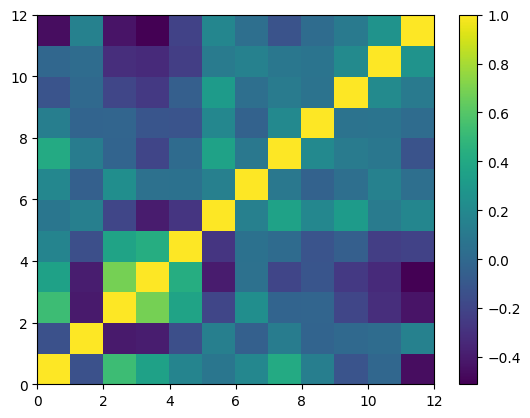

In [29]:
import matplotlib.pyplot as plt

plt.pcolor(corr_flavors)
plt.colorbar()

flavors의 테이블을 전치시켜서 상관관계를 계산

In [30]:
corr_whisky = pd.DataFrame(flavors.transpose())
print(corr_whisky)

           0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  \
Body        2   3   1   4   2   2   0   2   2   2  ...   2   4   1   1   2   
Sweetness   2   3   3   1   2   3   2   3   2   3  ...   3   2   2   3   2   
Smoky       2   1   2   4   2   1   0   1   1   2  ...   1   3   1   2   2   
Medicinal   0   0   0   4   0   1   0   0   0   1  ...   0   3   0   0   1   
Tobacco     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
Honey       2   4   2   0   1   1   1   2   1   0  ...   0   1   2   0   0   
Spicy       1   3   0   2   1   1   1   1   0   2  ...   2   3   0   2   2   
Winey       2   2   0   0   1   1   0   2   0   0  ...   0   0   1   0   0   
Nutty       2   2   2   1   2   0   2   2   2   2  ...   2   1   1   2   0   
Malty       2   3   2   2   3   1   2   2   2   1  ...   1   2   2   1   0   
Fruity      2   3   3   1   1   1   3   2   2   2  ...   3   2   2   2   2   
Floral      2   2   2   0   1   2   3   1   2   1  ...   2   0  

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

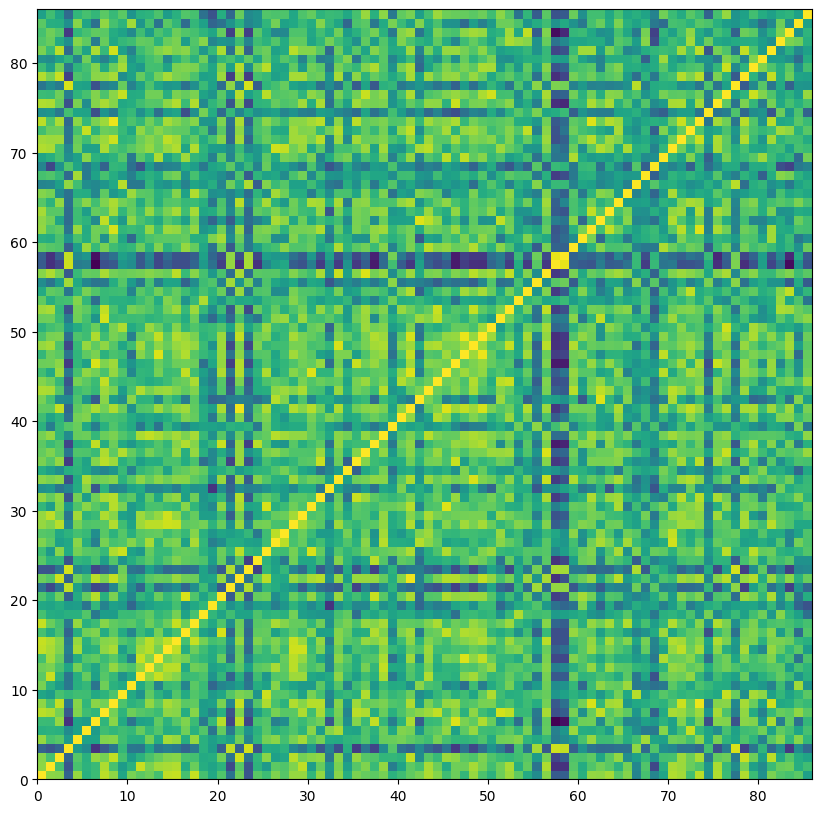

In [31]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10, 10))
plt.pcolor(corr_whisky)
plt.colorbar